<a href="https://colab.research.google.com/github/changyong93/Natural-language-processing-with-chat-bot/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC_%EC%9E%85%EB%AC%B8(13_4_NLP%EB%A5%BC_%EC%9C%84%ED%95%9C_%EC%8B%A0%EA%B2%BD%EB%A7%9D(CNN)_%EA%B0%9C%EC%B2%B4%EB%AA%85_%EC%9D%B8%EC%8B%9D%EC%9D%98_BIO_%ED%91%9C%ED%98%84_%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개체명 인식의 BIO 표현 이해하기

In [10]:
import re

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [25]:
f = open('./train.txt', 'r')
tagged_sentences = []
sentence = []

for line in f:
    if len(line)==0 or line.startswith('-DOCSTART') or line[0]=="\n":
        if len(sentence) > 0:
            tagged_sentences.append(sentence)
            sentence = []
        continue
    splits = line.split(' ') # 공백을 기준으로 속성을 구분한다.
    splits[-1] = re.sub(r'\n', '', splits[-1]) # 줄바꿈 표시 \n을 제거한다.
    word = splits[0].lower() # 단어들은 소문자로 바꿔서 저장한다.
    sentence.append([word, splits[-1]]) # 단어와 개체명 태깅만 기록한다.))

In [26]:
print("전체 샘플 수: ", len(tagged_sentences))

전체 샘플 수:  14041


In [27]:
print(tagged_sentences[0])

[['eu', 'B-ORG'], ['rejects', 'O'], ['german', 'B-MISC'], ['call', 'O'], ['to', 'O'], ['boycott', 'O'], ['british', 'B-MISC'], ['lamb', 'O'], ['.', 'O']]


In [31]:
sentences, ner_tags = [], []

for tagged_sentence in tagged_sentences:
  sentence, tag_info = zip(*tagged_sentence)
  sentences.append(list(sentence))
  ner_tags.append(list(tag_info))

In [32]:
print(sentences[0])
print(ner_tags[0])

['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']
['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']


In [33]:
print(sentences[12])
print(ner_tag[12])

['only', 'france', 'and', 'britain', 'backed', 'fischler', "'s", 'proposal', '.']
['O', 'B-LOC', 'O', 'B-LOC', 'O', 'B-PER', 'O', 'O', 'O']


샘플의 최대 길이 : 113
샘플의 평균 길이 : 14.501887


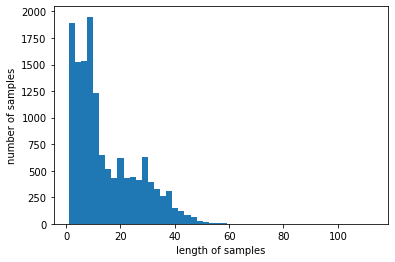

In [34]:
print('샘플의 최대 길이 : %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len, sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [35]:
vocab_size = 4000
src_tokenizer = Tokenizer(num_words = vocab_size, oov_token="OOV")
src_tokenizer.fit_on_texts(sentences)

tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(ner_tags)

In [36]:
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기 : {}'.format(tag_size))
print(tar_tokenizer.word_index)

단어 집합의 크기 : 4000
개체명 태깅 정보 집합의 크기 : 10
{'o': 1, 'b-loc': 2, 'b-per': 3, 'b-org': 4, 'i-per': 5, 'i-org': 6, 'b-misc': 7, 'i-loc': 8, 'i-misc': 9}


In [37]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(ner_tags)

In [38]:
i = 8
print(X_train[i])
print(y_train[i])

[3385, 1544, 1, 1462, 42, 744, 27, 137, 9, 146, 25, 104, 1, 860, 1632, 126, 745, 1, 1, 1, 10, 2011, 11, 54, 1745, 1873, 648, 3]
[3, 1, 7, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 7, 9, 9, 1, 7, 1, 1, 1, 1, 1, 1]


In [39]:
index_to_word = src_tokenizer.index_word
index_to_ner = tar_tokenizer.index_word

In [40]:
decoded = []
for idx in X_train[0]:
  decoded.append(index_to_word[idx])

In [41]:
print("기존 문장: ", sentences[0])
print("OOV 처리문장: ",decoded)

기존 문장:  ['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']
OOV 처리문장:  ['eu', 'OOV', 'german', 'call', 'to', 'boycott', 'british', 'OOV', '.']


In [42]:
max_len = 70
X_train = pad_sequences(X_train, maxlen = max_len,padding = "post")
y_train = pad_sequences(y_train, maxlen = max_len,padding = "post")

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2, random_state=777)

In [44]:
y_train = to_categorical(y_train,num_classes=tag_size)
y_test = to_categorical(y_test,num_classes=tag_size)

In [45]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (11232, 70)
훈련 샘플 레이블의 크기 : (11232, 70, 10)
테스트 샘플 문장의 크기 : (2809, 70)
테스트 샘플 레이블의 크기 : (2809, 70, 10)


## 양방향 LSTM(Bi-directional LSTM)으로 개체명 인식기 만들기

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, TimeDistributed
from tensorflow.keras.optimizers import Adam

In [49]:
model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = 128, input_length = max_len, mask_zero = True)) #mask_zero = True 시 특정 단계가 누락, 즉 0인경우 넘어가기
model.add(Bidirectional(LSTM(units = 256, return_sequences=True)))
model.add(Dense(units = tag_size, activation = "softmax"))


In [50]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=8,  validation_data=(X_test, y_test))

Epoch 1/8
88/88 [==============================] - 40s 51ms/step - loss: 0.2547 - accuracy: 0.7917 - val_loss: 0.1264 - val_accuracy: 0.8328
Epoch 2/8
88/88 [==============================] - 2s 28ms/step - loss: 0.1111 - accuracy: 0.8417 - val_loss: 0.0760 - val_accuracy: 0.8918
Epoch 3/8
88/88 [==============================] - 2s 28ms/step - loss: 0.0698 - accuracy: 0.8994 - val_loss: 0.0518 - val_accuracy: 0.9261
Epoch 4/8
88/88 [==============================] - 2s 28ms/step - loss: 0.0488 - accuracy: 0.9311 - val_loss: 0.0406 - val_accuracy: 0.9431
Epoch 5/8
88/88 [==============================] - 2s 28ms/step - loss: 0.0363 - accuracy: 0.9487 - val_loss: 0.0361 - val_accuracy: 0.9497
Epoch 6/8
88/88 [==============================] - 2s 27ms/step - loss: 0.0303 - accuracy: 0.9567 - val_loss: 0.0359 - val_accuracy: 0.9524
Epoch 7/8
88/88 [==============================] - 2s 27ms/step - loss: 0.0266 - accuracy: 0.9626 - val_loss: 0.0321 - val_accuracy: 0.9567
Epoch 8/8
88/88 [==

In [51]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

88/88 [==============================] - 1s 6ms/step - loss: 0.0312 - accuracy: 0.9584

 테스트 정확도: 0.9584


In [112]:
i = 10 # 확인하고 싶은 테스트용 샘플의 인덱스 번호
y_pred = model.predict(np.array([X_test[i]]))
y_pred = np.argmax(y_pred,-1)
true = np.argmax(y_test[i],-1)


print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(X_test[i], true, y_predicted[0]):
    if w != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t].upper(), index_to_ner[pred].upper()))

단어             |실제값  |예측값
-----------------------------------
sarah            : B-PER   B-PER
brady            : I-PER   I-PER
,                : O       O
whose            : O       O
republican       : B-MISC  B-MISC
husband          : O       O
was              : O       O
OOV              : O       O
OOV              : O       O
in               : O       O
an               : O       O
OOV              : O       O
attempt          : O       O
on               : O       O
president        : O       O
ronald           : B-PER   B-PER
reagan           : I-PER   I-PER
,                : O       O
took             : O       O
centre           : O       O
stage            : O       O
at               : O       O
the              : O       O
democratic       : B-MISC  B-MISC
national         : I-MISC  I-MISC
convention       : I-MISC  I-MISC
on               : O       O
monday           : O       O
night            : O       O
to               : O       O
OOV              : O       O
pre

array([[3, 5, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 5, 1, 1, 1, 1, 1,
        1, 7, 9, 9, 1, 1, 1, 1, 1, 1, 3, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1]])